<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/PCA_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principal Component Analysis

# What is PCA?

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data.

PCA can be used to simplify the data with high dimensions (larger than 2) into 2-dimensional data by eliminating the least influntial features on the data. However, we should know the elimination of data makes the independent variable less interpretable.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import datasets
from sklearn.decomposition import PCA

## Step 1: Load the dataset

In an unsupervised learning approach, the first step is to visualize the data so get a sense or feel of what we are working on.

We plot our data using scatterplots in either 2 dimensions or 3 dimensions to see any patterns or groupings that is currently in our data.

Unfortunately, this approach will not work because most real world datasets more than 3 dimensions.

As an example, let's use the famous iris dataset, which has the following 4 dimensions:
 * Sepal Length
 * Sepal Width
 * Pedal Length
 * Pedal Width

In [25]:
cfd = pd.read_csv('creditcard.csv')

X = cfd.drop('Class', axis=1)
y = cfd['Class']

feature_names = X.columns

This dataset is made of 4 features/dimensions: sepal length, sepal width, petal length, petal width.

In [26]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Step 2: Use PCA to for reduce the dimensions

Dimensions of iris data set before PCA

In [27]:
X.shape

(221880, 30)

We use PCA to project this 4 feature space into a 2-dimensional space.

In [28]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

pca = PCA(n_components=10)
X_principal = pca.fit_transform(X_imputed)

Dimensions of iris data set after PCA

In [29]:
X_principal.shape

(221880, 10)

## Step 3: Display the explained variances of each principal component using a Scree Plot

In [30]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

PC4_explainedvariance = explained_variance[3]
print("Explained variance of PC4", PC4_explainedvariance)

PC5_explainedvariance = explained_variance[4]
print("Explained variance of PC5", PC5_explainedvariance)

PC6_explainedvariance = explained_variance[5]
print("Explained variance of PC6", PC6_explainedvariance)

PC7_explainedvariance = explained_variance[6]
print("Explained variance of PC7", PC7_explainedvariance)

PC8_explainedvariance = explained_variance[7]
print("Explained variance of PC8", PC8_explainedvariance)

PC9_explainedvariance = explained_variance[8]
print("Explained variance of PC9", PC9_explainedvariance)

PC10_explainedvariance = explained_variance[9]
print("Explained variance of PC10", PC10_explainedvariance)

Explained variance of PC1 0.9999576225295956
Explained variance of PC2 4.23583169378842e-05
Explained variance of PC3 2.4292845248273106e-09
Explained variance of PC4 1.6464675360483977e-09
Explained variance of PC5 1.3398090510880226e-09
Explained variance of PC6 1.2809850750600163e-09
Explained variance of PC7 1.2154673713764205e-09
Explained variance of PC8 1.0554649477924319e-09
Explained variance of PC9 9.860968886662694e-10
Explained variance of PC10 8.879012743188543e-10


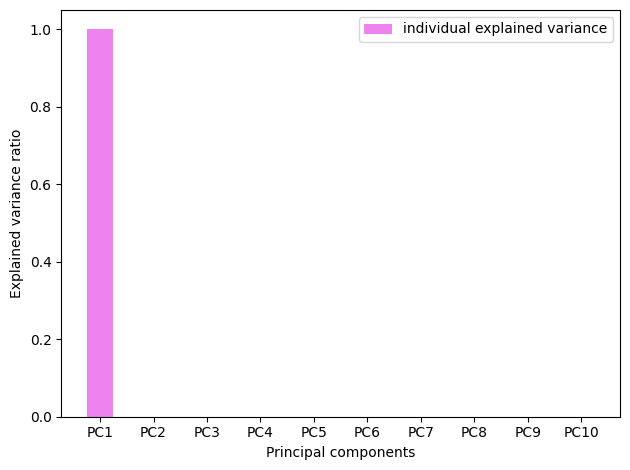

In [31]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## Step 4: Plot the features after doing PCA

In [32]:
PC_df = pd.DataFrame({'PC1': X_principal[:, 0], 'PC2': X_principal[:, 1], 'PC3': X_principal[:, 2],
                      'PC4': X_principal[:, 3], 'PC5': X_principal[:, 4], 'PC6': X_principal[:, 5],
                      'PC7': X_principal[:, 6], 'PC8': X_principal[:, 7], 'PC9': X_principal[:, 8], 'PC10': X_principal[:, 9]})
PC_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-77296.820962,61.684455,-0.654714,-0.453357,0.376088,1.649541,-0.255858,-0.557416,0.230839,0.035669
1,-77296.826283,-85.248817,1.394622,0.429712,0.637392,-0.683798,0.412511,0.921207,-0.134989,-0.983655
2,-77295.812596,290.729685,-0.146759,-0.626732,-0.378841,0.891621,0.919289,-0.336227,0.584233,-1.582253
3,-77295.821886,35.564716,-0.304100,-0.635023,-1.289996,0.426047,0.954667,-0.446838,0.614157,-1.061978
4,-77294.823839,-17.947308,-0.798728,0.338174,-0.439204,1.144921,-0.192171,0.155301,-0.117576,0.370815


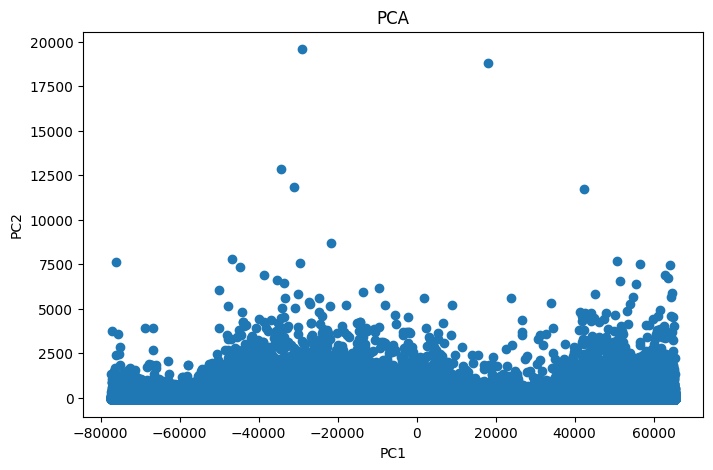

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC1'], PC_df['PC2'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

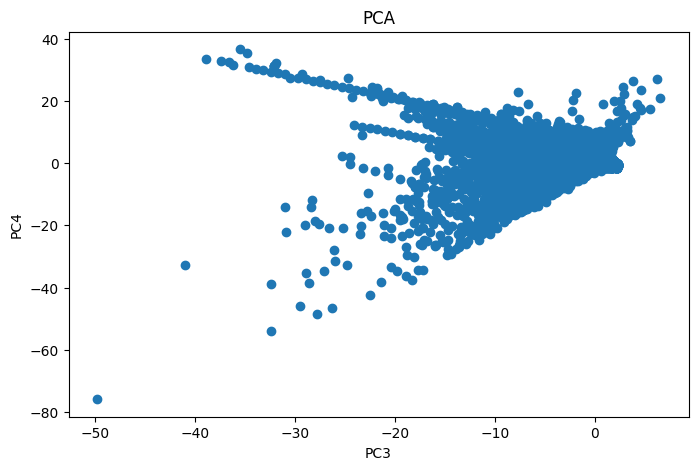

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC3'], PC_df['PC4'])
plt.title('PCA')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

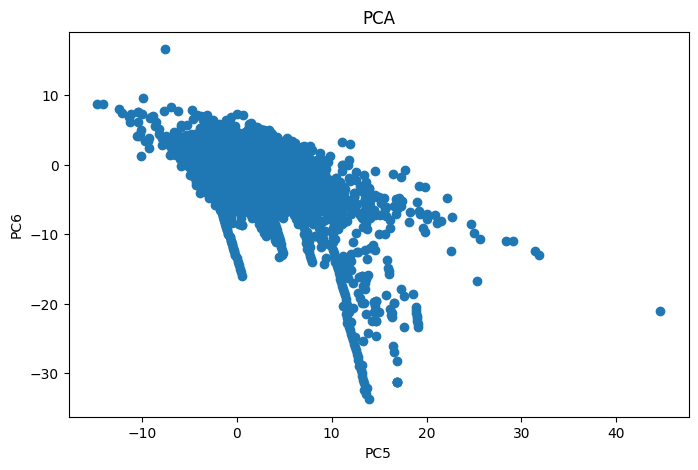

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC5'], PC_df['PC6'])
plt.title('PCA')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.show()

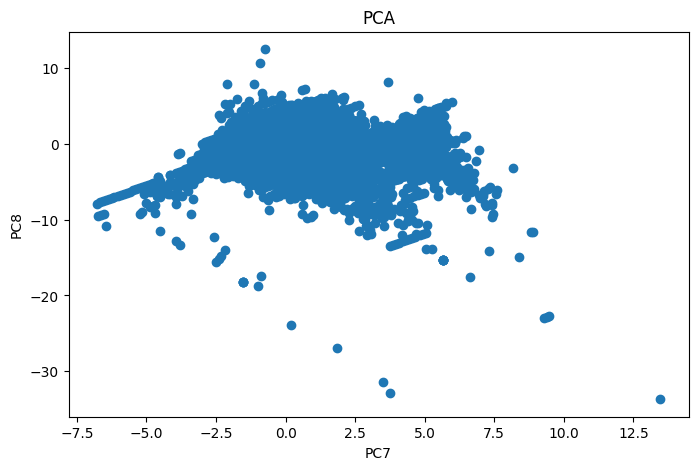

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC7'], PC_df['PC8'])
plt.title('PCA')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.show()

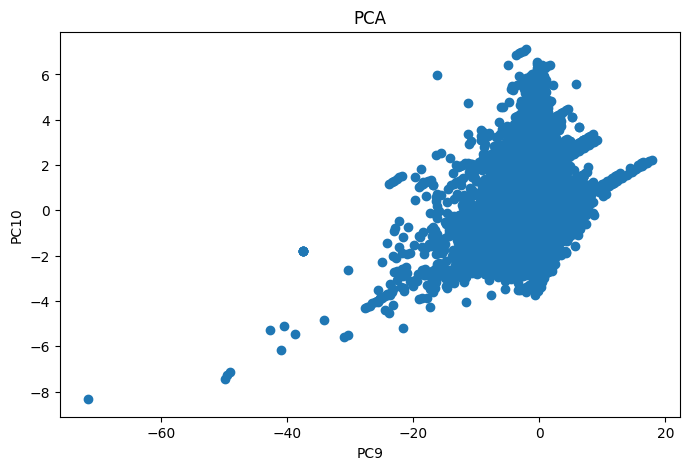

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC9'], PC_df['PC10'])
plt.title('PCA')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.show()

## Step 5: Get the loadings

Each feature will get a weight or loading that indicate the how much it contributes to a specific principal component (PC)

In [38]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=feature_names)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Time,38551.561084,-0.009161,-0.000007,-0.000003,-0.000003,0.000011,-0.000008,-0.000010,0.000002,0.000004
V1,0.212072,-0.453412,1.855136,0.163335,0.050408,-0.049245,0.031701,0.065930,-0.046500,-0.020360
V2,-0.059033,-0.897623,-0.282183,1.224927,-0.307335,0.374276,0.002484,0.144722,-0.029168,-0.029003
V3,-0.577143,-0.310123,0.152639,-0.607102,-0.428227,0.875461,-0.380541,-0.391942,0.030900,0.098704
V4,-0.132926,0.129317,-0.006329,0.292640,1.209581,0.573102,-0.181004,-0.171354,0.015944,0.004803
V5,0.229391,-0.514425,-0.148538,-0.606966,0.295344,0.313104,0.697669,0.575138,-0.109602,-0.179461
V6,-0.062689,0.271344,0.102428,0.222472,-0.177814,0.273476,1.049841,-0.568301,0.154258,0.032036
V7,0.103815,0.461162,0.144604,0.105108,-0.319345,0.630334,-0.075674,0.713670,0.170022,-0.047991
V8,-0.059260,-0.116312,0.019732,-0.044272,0.097575,-0.140604,-0.023130,0.103201,1.169043,0.091102
V9,-0.008248,-0.038584,-0.022462,-0.050478,0.015480,0.065298,0.075147,0.118853,-0.079155,0.978415


## Step 6: Use a clustering algorithm

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(PC_df)
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Cluster centroids

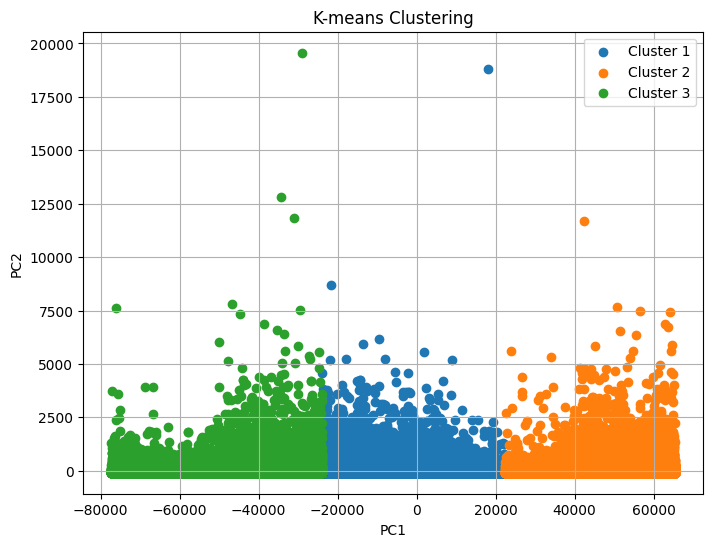

In [40]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

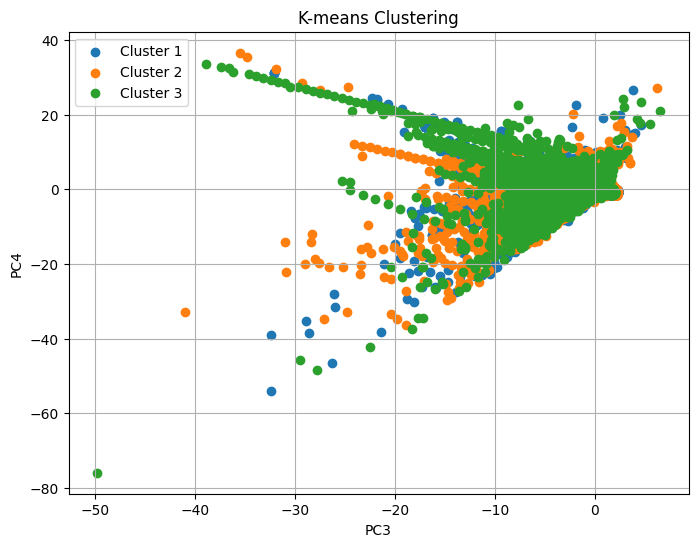

In [41]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 2], cluster_points[:, 3],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.legend()
plt.grid(True)
plt.show()

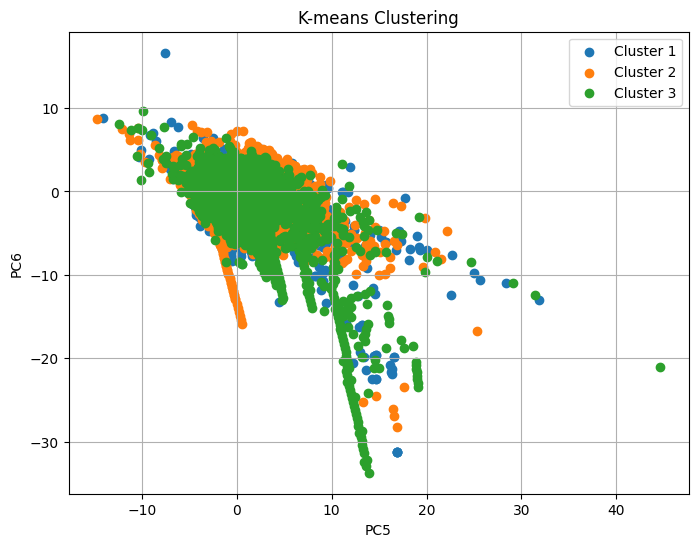

In [42]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 4], cluster_points[:, 5],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.legend()
plt.grid(True)
plt.show()

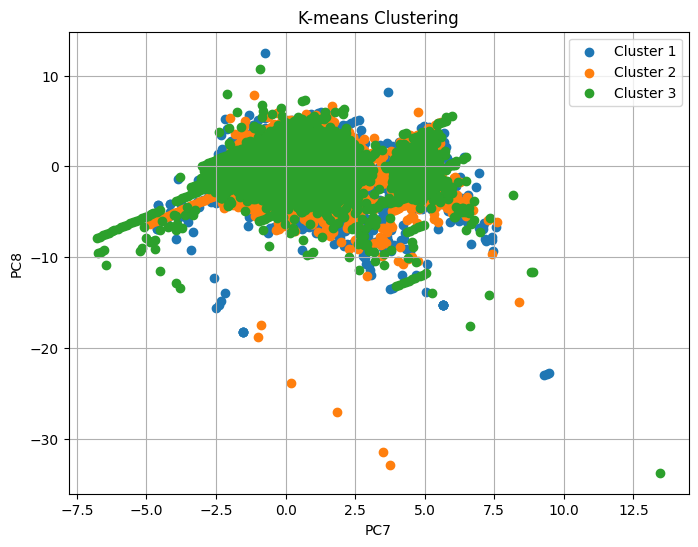

In [43]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 6], cluster_points[:, 7],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.legend()
plt.grid(True)
plt.show()

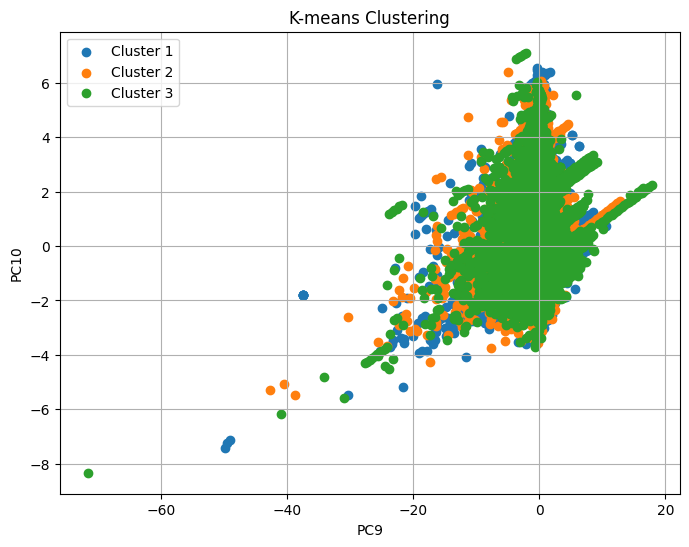

In [44]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 8], cluster_points[:, 9],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.legend()
plt.grid(True)
plt.show()